# Part1 :  EDA & Data Preprocessing on Google App Store Rating Dataset.

<font color='blue' size='5'>Q1. Import required libraries and read the dataset.

In [1]:
# Numerical libraries
import math
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
dataapps = pd.read_csv('Apps_data.csv')

In [3]:
dataapps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


 <font color='blue' size='5'>Q2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.
</font>

In [4]:
dataapps.shape

(10841, 13)

In [5]:
dataapps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
dataapps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
dataapps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Observations : We could see the following dataset contains 13 columns and 10841 rows
    as per info we could see rating column as more null values & we could see many columns are of object datatype

 <font color='blue' size='5'> Q3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:
statsumry = dataapps.describe(include='all').T
statsumry

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The List out the columns that need to be worked upon for model building are Category,Rating,Reviews, Size,Installs, Price

<font color='blue' size='5'> Q4. Check if there are any duplicate records in the dataset? if any drop them.

In [10]:
dataapps.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [9]:
print('The sum of All duplicate values in dataset is :',dataapps.duplicated().sum())

The sum of All duplicate values in dataset is : 483


In [11]:
ab = np.array(dataapps.shape)

In [12]:
print('The following dataset contains ',ab[0] ,'Rows and',ab[1], 'Columns as of now before dropping')

The following dataset contains  10841 Rows and 13 Columns as of now before dropping


In [13]:
#dropping duplicate values from dataset
dataapps.drop_duplicates(keep='first',inplace=True)

In [14]:
ab1 = np.array(dataapps.shape)

In [15]:
print('The following dataset contains ',ab1[0] ,'Rows and',ab1[1], 'Columns as of now after dropping')

The following dataset contains  10358 Rows and 13 Columns as of now after dropping


In [16]:
#Post verfication of duplicated values
dataapps.duplicated().sum()
# as per o/p no duplicated values and all are dropped 

0

<font color='blue' size='5'> Q5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [17]:
unique_categories = dataapps['Category'].unique()
unique_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
dataapps['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [19]:
#from this we can see one row 1.9 is not proper hence dropping it 
invalid_rows = dataapps[dataapps['Category'].str.contains('1.9')] #dataapps[dataapps['Category'] == '1.9']
invalid_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
# Droping rows with '1.9' value in 'Category' column
dataapps = dataapps[~dataapps['Category'].str.contains('1.9')]

In [21]:
#Post Verfication :  We can see the row with 1.9 value is dropped 
dataapps[dataapps['Category'].str.contains('1.9')] #dataapps[dataapps['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [22]:
#before we are having 10358 Rows and 13 Columns 
dataapps.shape
#we can see after dropping 1.9 column the row count is reduced to 1 

(10357, 13)

<font color='blue' size='5'> Q6.Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [23]:
# Checking for missing values in the 'Rating' column & getting total value  
dataapps['Rating'].isnull().sum()

1465

In [24]:
# getting all missing values from 'Rating' column
missing_values_ratingcol = dataapps[dataapps['Rating'].isnull()]
missing_values_ratingcol

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [25]:
 # Droping rows with null values in 'Rating' column 
dataapps = dataapps.dropna(subset=['Rating'])

In [26]:
#post verification : after dropping columns from rating
dataapps.shape

(8892, 13)

In [27]:
dataapps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.6+ KB


In [28]:
# Creating 'Rating_category' column based on the rating values
dataapps['Rating_category'] = dataapps['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low') 

In [29]:
dataapps['Rating_category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8892, dtype: object

In [30]:
dataapps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   object 
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [31]:
#we can see new Column is created 
dataapps.shape

(8892, 14)

<font color='blue' size='5'> Q7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [32]:
rating_category_distribution=dataapps['Rating_category'].value_counts()
rating_category_distribution

High    8012
Low      880
Name: Rating_category, dtype: int64

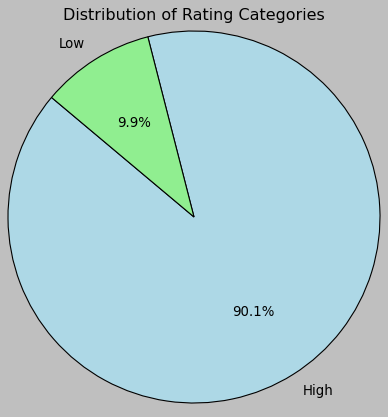

In [33]:
# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(rating_category_distribution, labels=rating_category_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Rating Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The data is distributed between 'High' and 'Low' categories. 

The distribution of the 'Rating_category' column shows that the 'High' category accounts for 90.1% of the apps, while the 'Low' category represents 9.9%. This indicates that a majority of the apps have received ratings above 3.5, falling into the 'High' category.

<font color='blue' size='5'> Q8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [35]:
# Converting "Reviews" column to numeric data type
dataapps['Reviews'] = pd.to_numeric(dataapps['Reviews'], errors='coerce')  # Converting non-numeric values to NaN

In [36]:
#post verification : of datatype 
dataapps['Reviews'].dtype
#intially we had object now it is converted to int 

dtype('int64')

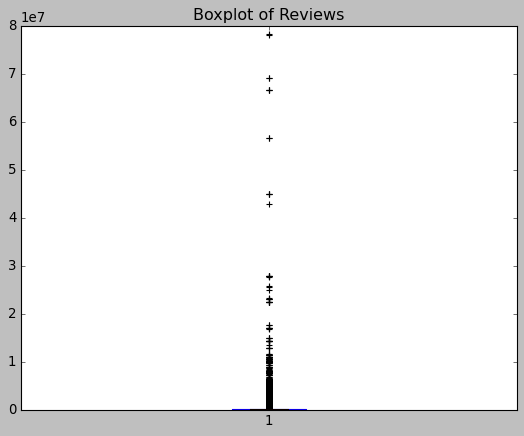

In [37]:
# Checking for presence of outliers

plt.boxplot(dataapps['Reviews'])
plt.title("Boxplot of Reviews")
plt.show()

In [38]:
# Applying log transformation to handle outliers
dataapps['Reviews'] = np.log1p(dataapps['Reviews']) 

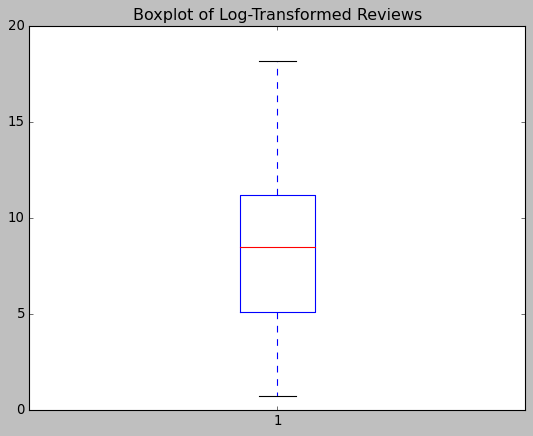

In [39]:
# Check for presence of outliers in log-transformed data
plt.boxplot(dataapps['Reviews'])
plt.title("Boxplot of Log-Transformed Reviews")
plt.show()

In [ ]:
# we can see all outliers for the Box plot are removed 

<font color='blue' size='5'> Q9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [40]:
dataapps['Size'].value_counts()

Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [41]:
# Replacing 'M' with 1 million and 'K' with 1 thousand
dataapps['Size'] = dataapps['Size'].str.replace('M', 'e6').str.replace('k', 'e3')

# Droping entries where 'Size' is 'Varies with device'
dataapps = dataapps[dataapps['Size'] != 'Varies with device']

# Converting 'Size' column to float data type
dataapps['Size'] = dataapps['Size'].astype(float)

In [42]:
#post verififcation:
dataapps['Size'].value_counts()
#we can see all the Million & Thousands are replaced accordingly 

14000000.0    154
13000000.0    152
12000000.0    151
11000000.0    150
15000000.0    149
             ... 
383000.0        1
454000.0        1
812000.0        1
442000.0        1
619000.0        1
Name: Size, Length: 412, dtype: int64

In [43]:
#post verfifcation : we can see no rows with "Varies with device" in Size column 
dataapps[dataapps['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category


<font color='blue' size='5'> Q10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [44]:
dataapps['Installs'].value_counts()

1,000,000+        1230
100,000+          1003
10,000+            949
10,000,000+        762
1,000+             675
5,000,000+         493
500,000+           471
50,000+            432
5,000+             414
100+               297
500+               195
100,000,000+       192
50,000,000+        144
10+                 67
50+                 56
500,000,000+        24
5+                   9
1,000,000,000+       8
1+                   3
Name: Installs, dtype: int64

In [45]:
# Removing unwanted characters from 'Installs' column i.e commos & + symbols 
dataapps['Installs'] = dataapps['Installs'].str.replace(',', '').str.replace('+', '')

# Converting 'Installs' column to integer data type
dataapps['Installs'] = dataapps['Installs'].astype(int)

C:\Users\Aneeshwar\AppData\Local\Temp\ipykernel_17496\4058388952.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataapps['Installs'] = dataapps['Installs'].str.replace(',', '').str.replace('+', '')


In [46]:
#post verfifcation :  
dataapps['Installs'].value_counts()
#we can see all the commos and + symbols are replaced 

1000000       1230
100000        1003
10000          949
10000000       762
1000           675
5000000        493
500000         471
50000          432
5000           414
100            297
500            195
100000000      192
50000000       144
10              67
50              56
500000000       24
5                9
1000000000       8
1                3
Name: Installs, dtype: int64

In [47]:
#we can see "installs"  column it is converted to int datatype from object 
dataapps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   int32  
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(3), int32(1), object(10)
memory usage: 841.0+ KB


<font color='blue' size='5'>Q11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [48]:
dataapps['Price'].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [49]:
# Removing unwanted characters ($) from 'Price' column
dataapps['Price'] = dataapps['Price'].str.replace('$', '')

# Converting 'Price' column to float data type
dataapps['Price'] = dataapps['Price'].astype(float)

C:\Users\Aneeshwar\AppData\Local\Temp\ipykernel_17496\3048654257.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataapps['Price'] = dataapps['Price'].str.replace('$', '')


In [50]:
#post verifcation :
dataapps['Price'].value_counts()
#we can see no $ symbols 

0.00      6877
0.99       104
2.99        98
4.99        61
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 68, dtype: int64

In [51]:
#Post verfication :  for the datatype of column "Price"
dataapps['Price'].info()
#we can see it is converted to float from object    

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
7424 non-null   float64
dtypes: float64(1)
memory usage: 116.0 KB


<font color='blue' size='5'> Q12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis

In [52]:
dataapps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   int32  
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   float64
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(4), int32(1), object(9)
memory usage: 841.0+ KB


In [53]:
# Creating a List of columns to drop from dataset
columns_to_drop = ['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

# Droping the specified columns from created List
dataapps = dataapps.drop(columns=columns_to_drop, axis=1)

In [54]:
#post verfication:
dataapps.info()
# we can see all the mentioned columns are dropped 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 493.0+ KB


<font color='blue' size='5'> Q13. Encode the categorical columns.

In [56]:
dataapps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 493.0+ KB


In [58]:
le = LabelEncoder()

In [59]:
le
#Getting LabelEncoder from scikit-learn library has it is used for encoding categorical (ordinal) data into numerical format.
#Its primary purpose is to convert categorical labels (text-based or string labels) into numerical labels.

LabelEncoder()

In [60]:
dataapps['Category'] = le.fit_transform(dataapps['Category'])

In [61]:
dataapps['Type'] = le.fit_transform(dataapps['Type'])

In [62]:
dataapps['Content Rating'] = le.fit_transform(dataapps['Content Rating'])

In [63]:
dataapps['Rating_category'] = le.fit_transform(dataapps['Rating_category'])

In [64]:
#Above the categorical columns are now converted to numerical columns 
dataapps.info()
#Post verfifcation :  we can see now columns are converted from object to float or int data types 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   int32  
 7   Rating_category  7424 non-null   int32  
dtypes: float64(3), int32(5)
memory usage: 377.0 KB


<font color='blue' size='5'> Q14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [65]:
# Separate the target ('Rating_category') from the independent features
X = dataapps.drop(columns=['Rating_category'])  # Independent features
y = dataapps['Rating_category']  # Target


In [66]:
X.shape

(7424, 7)

In [67]:
X.head

<bound method NDFrame.head of        Category    Reviews        Size  Installs  Type  Price  Content Rating
0             0   5.075174  19000000.0     10000     0    0.0               1
1             0   6.875232  14000000.0    500000     0    0.0               1
2             0  11.379520   8700000.0   5000000     0    0.0               1
3             0  12.281389  25000000.0  50000000     0    0.0               4
4             0   6.875232   2800000.0    100000     0    0.0               1
...         ...        ...         ...       ...   ...    ...             ...
10833         3   3.806662    619000.0      1000     0    0.0               1
10834        11   2.079442   2600000.0       500     0    0.0               1
10836        11   3.663562  53000000.0      5000     0    0.0               1
10837        11   1.609438   3600000.0       100     0    0.0               1
10840        18  12.894981  19000000.0  10000000     0    0.0               1

[7424 rows x 7 columns]>

In [68]:
y.shape

(7424,)

In [69]:
y.head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_category, Length: 7424, dtype: int32>

In [70]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Rating_category
Non-Null Count  Dtype
--------------  -----
7424 non-null   int32
dtypes: int32(1)
memory usage: 87.0 KB


In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        7424 non-null   int32  
 1   Reviews         7424 non-null   float64
 2   Size            7424 non-null   float64
 3   Installs        7424 non-null   int32  
 4   Type            7424 non-null   int32  
 5   Price           7424 non-null   float64
 6   Content Rating  7424 non-null   int32  
dtypes: float64(3), int32(4)
memory usage: 348.0 KB


<font color='blue' size='5'> Q15. Split the dataset into train and test.

In [75]:
# Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# printing the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5939, 7)
Shape of X_test: (1485, 7)
Shape of y_train: (5939, 1)
Shape of y_test: (1485, 1)


<font color='blue' size='5'> Q16. Standardize the data, so that the values are within a particular range.

In [78]:
scale = StandardScaler()

#scale = StandardScaler() creates an instance of the StandardScaler class from the scikit-learn library 
#StandardScaler is a preprocessing technique used to transform your data in such a way that it has a mean (average) of 0
#and a standard deviation of 1. This transformation is applied to each feature independently. 

In [84]:
X_train.iloc[:,1:4] = scale.fit_transform(X_train.iloc[:,1:4])
#applying Standardization for training set for all rows and 3 columns(Category,Reviews,Size)

In [85]:
X_test.iloc[:,1:4] = scale.fit_transform(X_test.iloc[:,1:4])
#applying Standardization for test set for all rows and 3 columns(Category,Reviews,Size)

In [86]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
9375,28,0.763470,1.370587,-0.057566,0,0.0,1
3025,28,0.767310,0.093936,-0.146613,0,0.0,1
7549,23,0.167948,-0.923130,-0.166648,0,0.0,1
6782,6,0.616788,-0.889085,-0.057566,0,0.0,1
1709,14,2.127191,3.115343,2.057298,0,0.0,1
...,...,...,...,...,...,...,...
7754,28,-1.298989,-0.906107,-0.168873,0,0.0,1
7795,11,0.032256,-0.684821,-0.167762,0,0.0,4
7988,11,0.551714,-0.416725,-0.157744,0,0.0,4
1446,16,1.431268,0.476931,0.053743,0,0.0,1


In [87]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
1867,14,1.301152,2.522173,-0.073400,0,0.0,4
4414,14,-0.833722,-0.646067,-0.170400,0,0.0,1
116,2,-0.854448,-0.848938,-0.170400,0,0.0,1
7608,11,0.830821,3.255961,-0.151156,0,0.0,1
9463,11,0.889755,1.961040,-0.073400,0,0.0,1
...,...,...,...,...,...,...,...
701,8,0.094701,-0.197161,-0.168651,0,0.0,1
1245,13,0.392535,0.104987,-0.168651,0,0.0,1
4228,29,0.407749,-0.805774,-0.151156,0,0.0,1
5766,14,1.830721,1.486236,0.023794,0,0.0,4
